# <p style="padding:10px;background-color:#85BB65;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Scaling, Normalization and Standardization</p>


It's easy to get confused between scaling and normalization is because the terms are sometimes used interchangeably and they are very similar! In both cases, you're transforming the values of numeric variables so that the transformed data points have specific helpful properties. The difference is that:

* **<span style='color:#85BB65'>scaling</span>** : you're changing the range of your data.
* **<span style='color:#85BB65'>normalization</span>** : you're changing the shape of the distribution to normal distributed.
* **<span style='color:#85BB65'>standardization(Z-score)</span>** : changing the shape of the distribution to standard normal distributed.

Let's talk a little more in-depth about each of these options.

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import MinMaxScaler , StandardScaler
from scipy.stats import boxcox


In [5]:
df = pd.read_csv(r"C:\Users\tawfi\projects\clean data tutorial\Scaling, Normalization and Standardization\Advertising.csv" ).drop(columns='Unnamed: 0')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# <b>I <span style='color:#85BB65'>|</span> Rescaling:</b> 

In machine learning, rescaling is a frequent pre-processing step. One of the simplest methods of rescaling is known as **<span style='color:#85BB65'>min-max scaling</span>**. A feature’s minimum and maximum values are used to rescale data to fit inside a predetermined range when using min-max scaling.

<p class="formulaDsp">
\[ X' = \frac{x_i - \min({x_i})}{\max({x_i})-\min({x_i})} \]
</p>

This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale data when you're using methods based on measures of how far apart data points are, like **support vector machines (SVM)** or **k-nearest neighbors (KNN)**. With these algorithms, a change of "1" in any numeric feature is given the same importance.

<br>
<div style="border-radius:10px;border:#85BB65 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
min-max scaling gives accurate results when the standard deviation is low and when the distribution does not follow the Gaussian model. This strategy is quite sensitive to data that contains outliers.
</div>


In [6]:
df1 = df.copy()

In [7]:
def plot_num_column(dataframe ,feature):
    
    print(f"the skewness value of {feature} column = {df[feature].skew():.2f}")
    
    plt.title('histgram')
    sns.histplot(data=dataframe, x=feature, kde=True,bins=30)
    plt.axvline(x = dataframe[feature].mean(), c = 'red')
    plt.axvline(x = dataframe[feature].median(), c = 'green')
    plt.show()

the skewness value of Newspaper column = 0.89


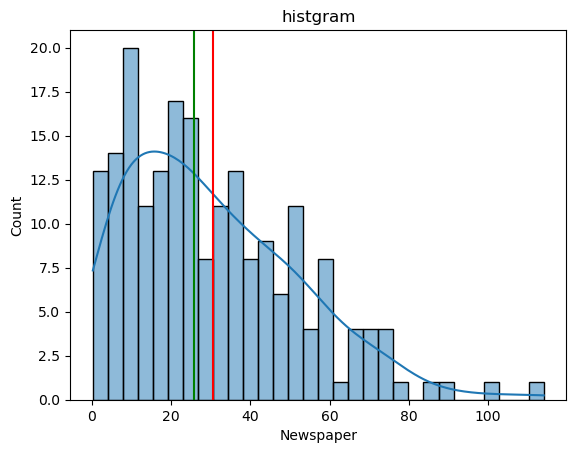

In [8]:
plot_num_column(df1 , 'Newspaper')

In [9]:
mim_max_scaler=MinMaxScaler(feature_range=(0,1))
df1['Newspaper'] = mim_max_scaler.fit_transform(df1['Newspaper'].values.reshape(-1, 1))

the skewness value of Newspaper column = 0.89


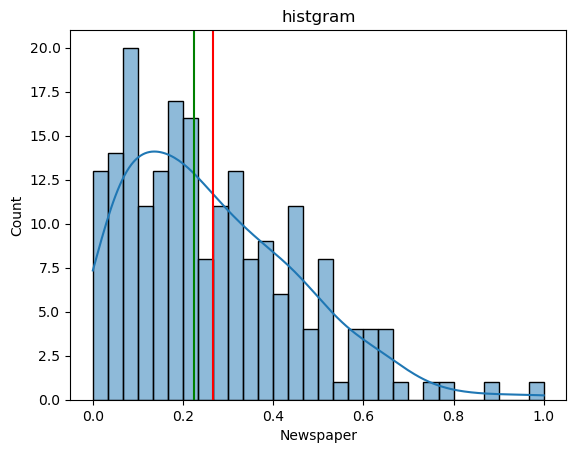

In [10]:
plot_num_column(df1 , "Newspaper")

**<span style='color:#85BB65'>Note that: </span>** the shape of the data doesn't change, but that instead of ranging from 0 to 100, it now ranges from 0 to 1.

# <b>II <span style='color:#85BB65'>|</span> Normalization:</b> 

<br>
<div style="border-radius:10px;border:#85BB65 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.
</div>

you'll normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. The method we're using to normalize here is called the **<span style='color:#85BB65'>Box-Cox Transformation</span>**.


#### **<mark style="background-color:#85BB65;color:white;border-radius:5px;opacity:1.0">Note that:</mark>**

**<span style='color:#85BB65'>Box-Cox Transformation</span>** requires the data to be positive. If your data contains zero or negative values, you may need to perform some data preprocessing or choose a different transformation method.


Let's take a quick peek at what normalizing some data looks like:

In [11]:
df2 = df.copy()

In [12]:
# Apply the Box-Cox transformation
col_bc ,_ ,_ = boxcox(df2['Newspaper'],alpha=0.05)


df2['Newspaper']=col_bc

the skewness value of Newspaper column = 0.89


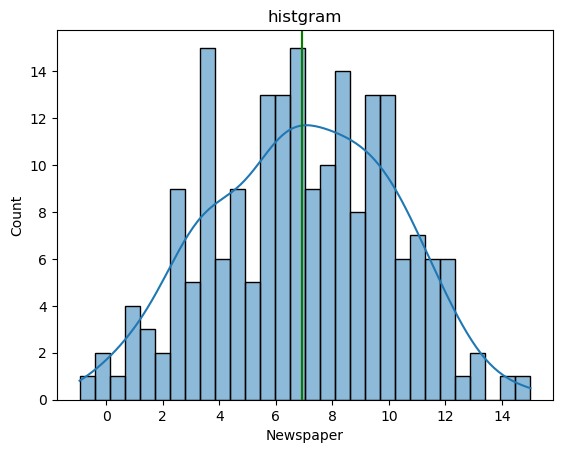

In [13]:
plot_num_column(df2 , "Newspaper")

In [11]:
print(f"the mean is {round(df2['Newspaper'].mean(),2)}")
print(f"the standard deviation is {round(df2['Newspaper'].std(),2)}")

the mean is 6.92
the standard deviation is 3.17


**<span style='color:#85BB65'>Note that: </span>**
* the value of mean equal value of median this indicates that it is normal distributed.
* the value of mean not equal 0 and value of std not equal 1  this indicates that it isn't standard distributed.
* the shape of our data has changed. Before normalizing it was almost L-shaped. But after normalizing it looks more like the outline of a bell (hence "bell curve").

# <b>III <span style='color:#85BB65'>|</span> Standardization (z-score normalization):</b> 

Rescaling features so that they are about standard normally distributed is a common alternative to the **<span style='color:#85BB65'>min-max scaling</span>** we talked about above.
To do this, we use a process called **<span style='color:#85BB65'>standardization </span>** to change the data so that its mean is 0 and its standard deviation is 1.

#### **<mark style="background-color:#85BB65;color:white;border-radius:5px;opacity:1.0">Note that:</mark>** 
we use Standardization when our data follow normal distributed. we will check about that.

<br>
<div style="border-radius:10px;border:#85BB65 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
Standardization can help identfy outliers, data point with Z-score above 3 or 4 is consedered outlier.
can be used to calculate P-value and test hyphesis.
</div>


In [14]:
df3 = df.copy()

In [15]:
# Instantiate the StandardScaler
ss = StandardScaler()

# Fit and transform the feature columns

# check about unnormal disributed df3
df3['Newspaper'] = ss.fit_transform(df3['Newspaper'].values.reshape(-1, 1))

# check about normal distributed df2 that normalized above.
df2['Newspaper'] = ss.fit_transform(df2['Newspaper'].values.reshape(-1, 1))


the skewness value of Newspaper column = 0.89


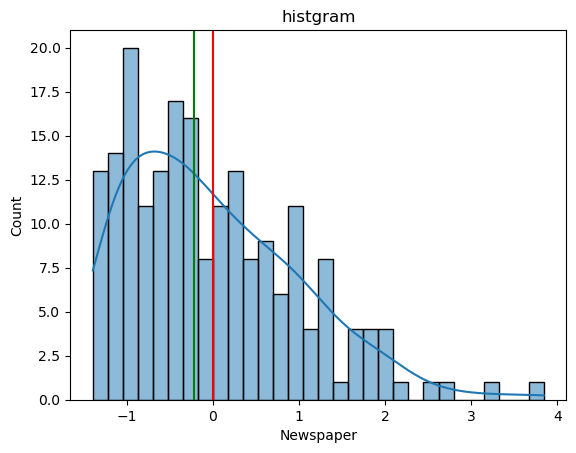

In [16]:
plot_num_column(df3 ,'Newspaper' )

In [17]:
print(f" the mean is {round(df3['Newspaper'].mean(),2)}")
print(f" the standard deviation is {round(df3['Newspaper'].std(),2)}")

 the mean is 0.0
 the standard deviation is 1.0


the skewness value of Newspaper column = 0.89


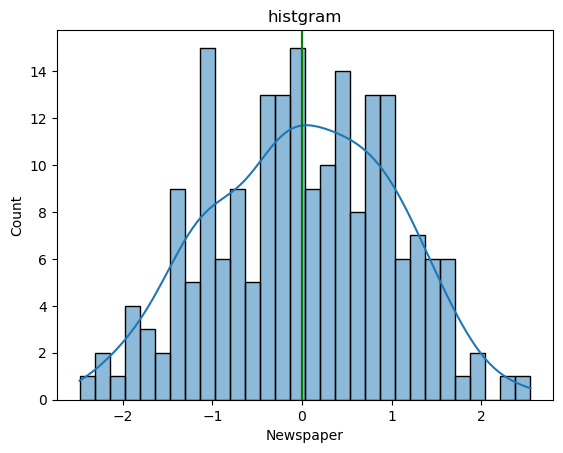

In [18]:
plot_num_column(df2 ,'Newspaper' )

In [17]:
print(f" the mean is {round(df2['Newspaper'].mean(),2)}")
print(f" the standard deviation is {round(df2['Newspaper'].std(),2)}")

 the mean is 0.0
 the standard deviation is 1.0


**<span style='color:#85BB65'>Note that: </span>**


* The shape of Newspaper distribution in df3 after standarization doesn't change alot that's becouse unnormality of Newspaper column but the mean equal 0 and std equal 1 like standard normal distributed.

* The shape of Newspaper distribution in df2  after standarization changes that's becouse Newspaper in df2 follow the normal distribution and the mean equal 0 and std equal 1 like standard normal distributed.


***

<br>

<div style="text-align: center;">
   <span style="font-size: 4.5em; font-weight: bold; font-family: Arial;">THANK YOU!</span>
</div>

<br>
<br>

<div style="text-align: center;">
    <span style="font-size: 5em;">✔️</span>
</div>

<br>

<div style="text-align: center;">
   <span style="font-size: 1.4em; font-weight: bold; font-family: Arial; max-width:1200px; display: inline-block;">
       If you find this notebook useful, I'd greatly appreciate your upvote!
   </span>
</div>
